In [98]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import os
import pandas as pd
import subprocess

### Generate shape pngs
Transparent background so can be overlayed over other random backgrounds. Random colour. Random size.

In [99]:
def gen_circles(num_images, path):
    """
    Generate PNG images of circles with random radius, color and position.
    
    Parameters:
        num_images (int): Number of PNG images to generate.
    """
    for i in range(1, num_images + 1):
        # Generate random radius and color
        radius = np.random.uniform(0.1, 0.5)  # Random radius between 0.1 and 0.5
        color = np.random.rand(3,)  # Random RGB color
        pos1 = np.random.uniform(0.3, 0.7)
        pos2 = np.random.uniform(0.3, 0.7)

        fig, ax = plt.subplots()
        circle_outer = plt.Circle((pos1, pos2), radius, color=color, fill=False, linewidth = 2)
        ax.add_artist(circle_outer)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # Turn off axes
        fig.set_size_inches(224/100, 224/100)
        filename = f"{path}/circle{i}.png"
        fig.savefig(filename, dpi=100, bbox_inches='tight', transparent=True)
        #plt.show()
        plt.close(fig)




In [100]:
def gen_squares(num_images, path):
    """
    Generate PNG images of circles with random radius, color and position.
    
    Parameters:
        num_images (int): Number of PNG images to generate.
    """
    sf = 0.975
    for i in range(1, num_images + 1):
        # Generate random radius and color
        length1 = np.random.uniform(0.1, 0.5) # Random length between 0.1 and 0.5
        length2 = length1 + np.random.uniform(-0.02, 0.02) # Make other length have some variance
        color = np.random.rand(3,)  # Random RGB color
        pos1 = np.random.uniform(0.3, 0.7)
        pos2 = np.random.uniform(0.3, 0.7)
        angle = np.random.uniform(0,360)

        fig, ax = plt.subplots()
        square_outer = plt.Rectangle((pos1, pos2), length1, length2, color=color, fill=False, angle=angle, linewidth = 2)
        ax.add_artist(square_outer)
        #ax.add_artist(square_inner)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # Turn off axes
        filename = f"{path}/square{i}.png"
        fig.set_size_inches(224/100, 224/100)
        fig.savefig(filename, dpi=100, bbox_inches='tight', transparent=True)
        #plt.show()
        plt.close(fig)


In [101]:

def gen_triangles(num_images,path):
    """
    Generate PNG images of random triangles with random colors.
    
    Parameters:
        num_images (int): Number of PNG images to generate.
    """
    for i in range(1, num_images + 1):
        # Generate random vertices for the triangle
        vertices = np.random.rand(3, 2)  # Generate 3 random (x, y) coordinates
        
        # Generate a random color for the triangle
        color = np.random.rand(3,)  # Random RGB color
        
        # Create a Polygon patch using the generated vertices
        triangle = Polygon(vertices, closed=True, color=color, fill=False, linewidth = 2)
        
        # Create plot
        fig, ax = plt.subplots()
        
        # Add triangle to plot
        ax.add_patch(triangle)
        
        # Set plot properties
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # Turn off axes
        
        # Save plot as PNG
        filename = f"{path}/triangle{i}.png"
        fig.set_size_inches(224/100, 224/100)
        fig.savefig(filename, dpi=100, bbox_inches='tight', transparent=True)
        
        # Close plot
        plt.close(fig)




In [102]:
def gen_pentagons(num_images,path):
    """
    Generate PNG images of random pentagons with random colors.
    
    Parameters:
        num_images (int): Number of PNG images to generate.
    """
    for i in range(1, num_images + 1):
        # Generate random vertices for the pentagon
        angle = 2 * np.pi / 5
        rotation = np.random.rand() * 2 * np.pi  # Random rotation
        vertices = np.array([[np.cos(rotation + j * angle), np.sin(rotation + j * angle)] for j in range(5)])
        # Scale and translate the pentagon to fit inside [0, 1] x [0, 1] square
        vertices = (vertices - vertices.min(axis=0)) / (vertices.max(axis=0) - vertices.min(axis=0))

        # Generate random scaling factors for x and y axes
        scale_factors = np.random.rand(2,) * 0.8 + 0.2  # Random scale factors between 0.2 and 1.0
        vertices[:, 0] *= scale_factors[0]
        vertices[:, 1] *= scale_factors[1]
        
        # Generate a random color for the pentagon
        color = np.random.rand(3,)  # Random RGB color
        
        # Create a Polygon patch using the generated vertices
        pentagon = Polygon(vertices, closed=True, color=color, fill=False, linewidth=2)
        
        # Create plot
        fig, ax = plt.subplots()
        
        # Add pentagon to plot
        ax.add_patch(pentagon)
        
        # Set plot properties
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # Turn off axes
        
        # Save plot as PNG
        filename = f"{path}/pentagon{i}.png"
        fig.set_size_inches(224/100, 224/100)
        fig.savefig(filename, dpi=100, bbox_inches='tight', transparent=True)
        
        # Close plot
        plt.close(fig)



In [103]:
def gen_hexagons(num_images,path):
    """
    Generate PNG images of random hexagons with random sizes and colors.
    
    Parameters:
        num_images (int): Number of PNG images to generate.
    """
    for i in range(1, num_images + 1):
        # Generate random vertices for the hexagon
        angle = 2 * np.pi / 6
        rotation = np.random.rand() * 2 * np.pi  # Random rotation
        vertices = np.array([[np.cos(rotation + j * angle), np.sin(rotation + j * angle)] for j in range(6)])
        
        # Translate the hexagon to fit inside [0, 1] x [0, 1] square
        vertices = (vertices - vertices.min(axis=0)) / (vertices.max(axis=0) - vertices.min(axis=0))

        # Generate random scaling factors for x and y axes
        scale_factors = np.random.rand(2,) * 0.8 + 0.2  # Random scale factors between 0.2 and 1.0
        vertices[:, 0] *= scale_factors[0]
        vertices[:, 1] *= scale_factors[1]

        # Generate a random color for the hexagon
        color = np.random.rand(3,)  # Random RGB color
        
        # Create a Polygon patch using the generated vertices
        hexagon = Polygon(vertices, closed=True, color=color, fill=False, linewidth=2)
        
        # Create plot
        fig, ax = plt.subplots()
        
        # Add hexagon to plot
        ax.add_patch(hexagon)
        
        # Set plot properties
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # Turn off axes
        
        # Save plot as PNG
        filename = f"{path}/hexagon{i}.png"
        fig.set_size_inches(224/100, 224/100)
        fig.savefig(filename, dpi=100, bbox_inches='tight', transparent=True)
        
        # Close plot
        plt.close(fig)



### Overlaying over backgrounds

Here I am overlaying the shapes over some pictures I took of different white paper.

In [104]:
def overlay_images(background_path, overlay_path, output_path):
    try:
        # Open background and overlay images
        background = Image.open(background_path)
        overlay = Image.open(overlay_path)

        # Convert overlay image to RGBA mode if it's not already
        if overlay.mode != 'RGBA':
            overlay = overlay.convert('RGBA')

        # Resize overlay image to 224x224 pixels
        overlay = overlay.resize((224, 224))

        # Resize background image to 224x224 pixels
        background = background.resize((224, 224))

        # Calculate the maximum allowed starting positions for the overlay
        max_x = 0
        max_y = 0

        # Choose a random starting position for the overlay
        start_x = np.random.randint(0, max_x + 1)
        start_y = np.random.randint(0, max_y + 1)

        # Paste the overlay image onto the background image
        background.paste(overlay, (start_x, start_y), overlay)

        # Check if the output directory exists, if not, create it
        output_dir = os.path.dirname(output_path)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Save the output image
        background.save(output_path)
        #print("Image saved successfully as", output_path)
    except Exception as e:
        print("Error occurred while saving the image:", e)




# Generate training dataset

In [105]:
train_path = "Raw shapes"
gen_circles(100,train_path)
gen_squares(100,train_path)
gen_triangles(100,train_path)
gen_pentagons(100,train_path)
gen_hexagons(100,train_path)

In [106]:
for i in range(1,101,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/circle" + str(i) + ".png"
    output_path = "Data/circle" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,101,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/square" + str(i) + ".png"
    output_path = "Data/square" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,101,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/triangle" + str(i) + ".png"
    output_path = "Data/triangle" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,101,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/pentagon" + str(i) + ".png"
    output_path = "Data/pentagon" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,101,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/hexagon" + str(i) + ".png"
    output_path = "Data/hexagon" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)

In [107]:
df = pd.DataFrame(np.zeros((500,2)))

for i in range(100):
    df.iat[i,0] = "circle" + str(i+1) + ".jpg"
    df.iat[i,1] = 0

for i in range(100):
    df.iat[i+100,0] = "square" + str(i+1) + ".jpg"
    df.iat[i+100,1] = 1

for i in range(100):
    df.iat[i+200,0] = "triangle" + str(i+1) + ".jpg"
    df.iat[i+200,1] = 2

for i in range(100):
    df.iat[i+300,0] = "pentagon" + str(i+1) + ".jpg"
    df.iat[i+300,1] = 3

for i in range(100):
    df.iat[i+400,0] = "hexagon" + str(i+1) + ".jpg"
    df.iat[i+400,1] = 4

df.to_csv("data.csv",index=False,header=False)

# circle = 0
# square = 1
# triangle = 2
# pentagon = 3
# hexagon = 4

# Generate testing dataset

In [108]:
test_path = "Raw shapes"
gen_circles(10,test_path)
gen_squares(10,test_path)
gen_triangles(10,test_path)
gen_pentagons(10,test_path)
gen_hexagons(10,test_path)
for i in range(1,11,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/circle" + str(i) + ".png"
    output_path = "Test/circle" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,11,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/square" + str(i) + ".png"
    output_path = "Test/square" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,11,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/triangle" + str(i) + ".png"
    output_path = "Test/triangle" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,11,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/pentagon" + str(i) + ".png"
    output_path = "Test/pentagon" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)
for i in range(1,11,1):
    background_path = "Backgrounds/b3.jpg"
    overlay_path = "Raw shapes/hexagon" + str(i) + ".png"
    output_path = "Test/hexagon" + str(i) + ".jpg"
    overlay_images(background_path, overlay_path, output_path)

In [118]:
df = pd.DataFrame(np.zeros((50,2)))

for i in range(10):
    df.iat[i,0] = "circle" + str(i+1) + ".jpg"
    df.iat[i,1] = 0

for i in range(10):
    df.iat[i+10,0] = "square" + str(i+1) + ".jpg"
    df.iat[i+10,1] = 1

for i in range(10):
    df.iat[i+20,0] = "triangle" + str(i+1) + ".jpg"
    df.iat[i+20,1] = 2

for i in range(10):
    df.iat[i+30,0] = "pentagon" + str(i+1) + ".jpg"
    df.iat[i+30,1] = 3

for i in range(10):
    df.iat[i+40,0] = "hexagon" + str(i+1) + ".jpg"
    df.iat[i+40,1] = 4

df.to_csv("test.csv",index=False,header=False)

# Pytorch

In [110]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Adam

Make a dataset

In [111]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        image = transforms.ToPILImage()(image)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
labels_map = {
    0: "Circle",
    1: "Square",
    2: "Triangle",
    3: "Pentagon",
    4: "Hexagon",
}
classes = ["Circle","Square","Triangle","Pentagon","Hexagon"]

In [119]:
# Define normalization parameters
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

# Define a transform that includes normalization
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean, std)  # Normalize image
])

# Create an instance of CustomImageDataset with normalization
train_dataset = CustomImageDataset(annotations_file="data.csv", img_dir="Data/", transform=transform)
test_dataset = CustomImageDataset(annotations_file="test.csv",img_dir="Test/",transform=transform)

Make a model

In [120]:
# Define a convolution neural network
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*106*106, 10)

    def forward(self, input):
        input = input.float()
        output = F.relu(self.bn1(self.conv1(input)))
        #print("Output after conv1:", output.size())      
        output = F.relu(self.bn2(self.conv2(output)))
        #print("Output after conv2:", output.size())     
        output = self.pool(output)
        #print("Output after conv3:", output.size())                         
        output = F.relu(self.bn4(self.conv4(output))) 
        #print("Output after conv4:", output.size())    
        output = F.relu(self.bn5(self.conv5(output)))       
        #print("Output after conv5:", output.size())  
        output = output.view(-1, 24*106*106)
        output = self.fc1(output)

        return output

# Instantiate a neural network model 
model = Network()

 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

Dataloaders

In [121]:
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # WRONG, testing
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print("The number of images in a training set is: ", len(train_loader)*batch_size)

The number of images in a training set is:  500


Training

In [115]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "myFirstModel.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images.to(device))
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels.to(device)).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
            labels = labels.long()

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

In [116]:
# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch():

    for images, labels in test_loader:
        # Show all images as one image grid
        imageshow(torchvision.utils.make_grid(images))
       
        # Show the real labels on the screen 
        print('Real labels: ', ' '.join('%5s' % classes[labels[j].long()] 
                                   for j in range(len(labels))))
      
        # Let's see what if the model identifiers the  labels of those example
        outputs = model(images)
        
        # We get the probability for every 10 labels. The highest (max) probability should be correct label
        _, predicted = torch.max(outputs, 1)
        
        # Let's show the predicted labels on the screen to compare with the real ones
        print('Predicted: ', ' '.join('%5s' % classes[predicted[j].long()] 
                                  for j in range(len(labels))))

In [122]:
# Let's build our model
train(5)
print('Finished Training')

# Test which classes performed well
testAccuracy()

# Let's load the model we just created and test the accuracy per label
model = Network()
path = "myFirstModel.pth"
model.load_state_dict(torch.load(path))


The model will be running on cpu device
For epoch 1 the test accuracy over the whole test set is 26 %
For epoch 2 the test accuracy over the whole test set is 24 %
For epoch 3 the test accuracy over the whole test set is 34 %
For epoch 4 the test accuracy over the whole test set is 44 %


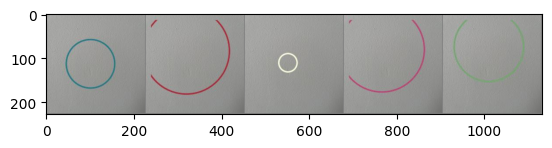

Real labels:  Circle Circle Circle Circle Circle
Predicted:  Circle Circle Circle Square Circle


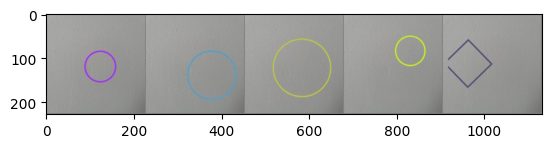

Real labels:  Circle Circle Circle Circle Square
Predicted:  Circle Square Circle Square Circle


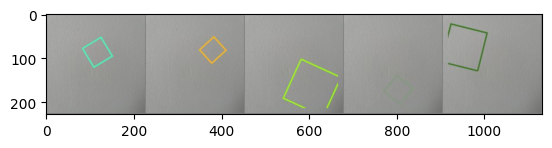

Real labels:  Square Square Square Square Square
Predicted:  Circle Square Circle Square Square


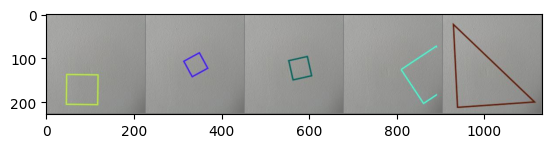

Real labels:  Square Square Square Square Triangle
Predicted:  Circle Circle Circle Square Circle


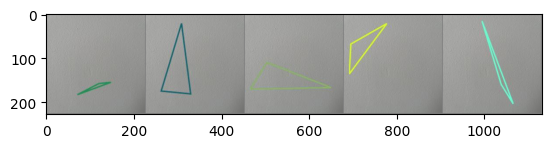

Real labels:  Triangle Triangle Triangle Triangle Triangle
Predicted:  Circle Circle Circle Circle Circle


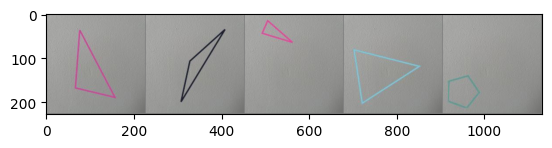

Real labels:  Triangle Triangle Triangle Triangle Pentagon
Predicted:  Circle Circle Square Circle Circle


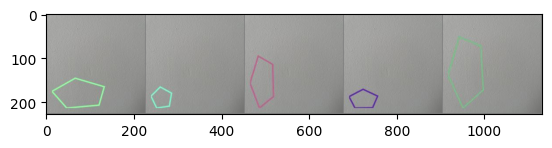

Real labels:  Pentagon Pentagon Pentagon Pentagon Pentagon
Predicted:  Hexagon Hexagon Hexagon Hexagon Hexagon


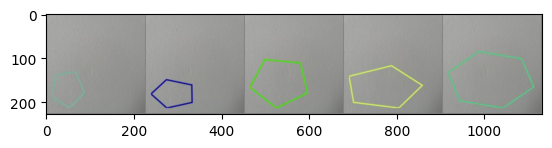

Real labels:  Pentagon Pentagon Pentagon Pentagon Hexagon
Predicted:  Circle Pentagon Hexagon Hexagon Hexagon


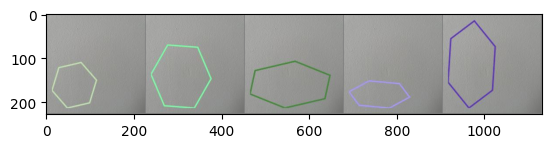

Real labels:  Hexagon Hexagon Hexagon Hexagon Hexagon
Predicted:  Circle Hexagon Hexagon Circle Circle


RuntimeError: [Errno 2] No such file or directory: 'Test/0.0'

In [ ]:

# Test with batch of images
# This is testing against itself...
testBatch()